In [0]:
%pip install rapidfuzz

  Obtaining dependency information for rapidfuzz from https://files.pythonhosted.org/packages/59/9d/eec7a1bfd3566fb17617b41bfb19556c483241d6864eea3c01b88efe5459/rapidfuzz-3.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached rapidfuzz-3.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached rapidfuzz-3.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('data_pre_process'))

# Import the module
import FeatureEngineering as FE

In [0]:
jobs_with_companies = pd.read_csv("data/pre_proccessed_data_for_second_stage.csv")

In [0]:
jobs_with_companies.shape

(5244, 43)

In [0]:
df = spark.createDataFrame(jobs_with_companies)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
df = df.toPandas()

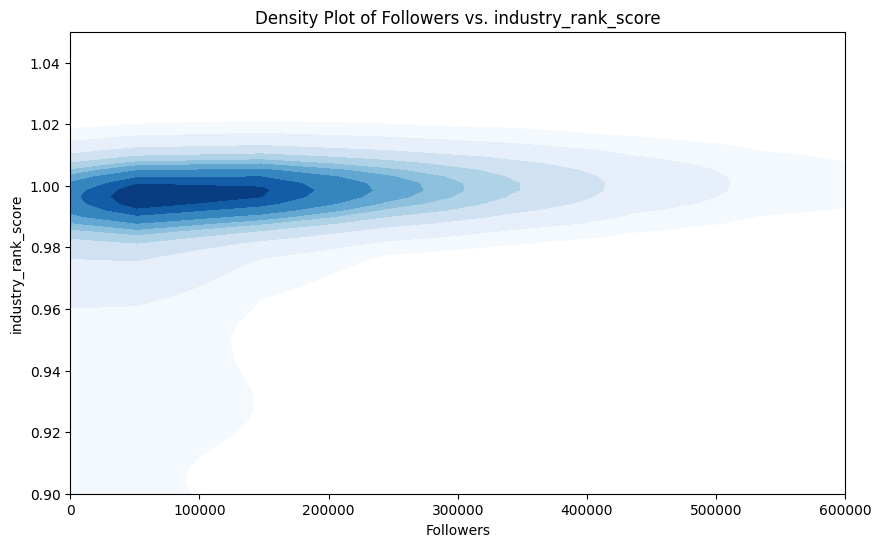

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="followers", y="industry_rank_score", fill=True, cmap="Blues")
plt.title("Density Plot of Followers vs. industry_rank_score")
plt.xlabel("Followers")
plt.ylabel("industry_rank_score")
plt.xlim(0, 600000)
plt.ylim(0.9, 1.05)
plt.show()

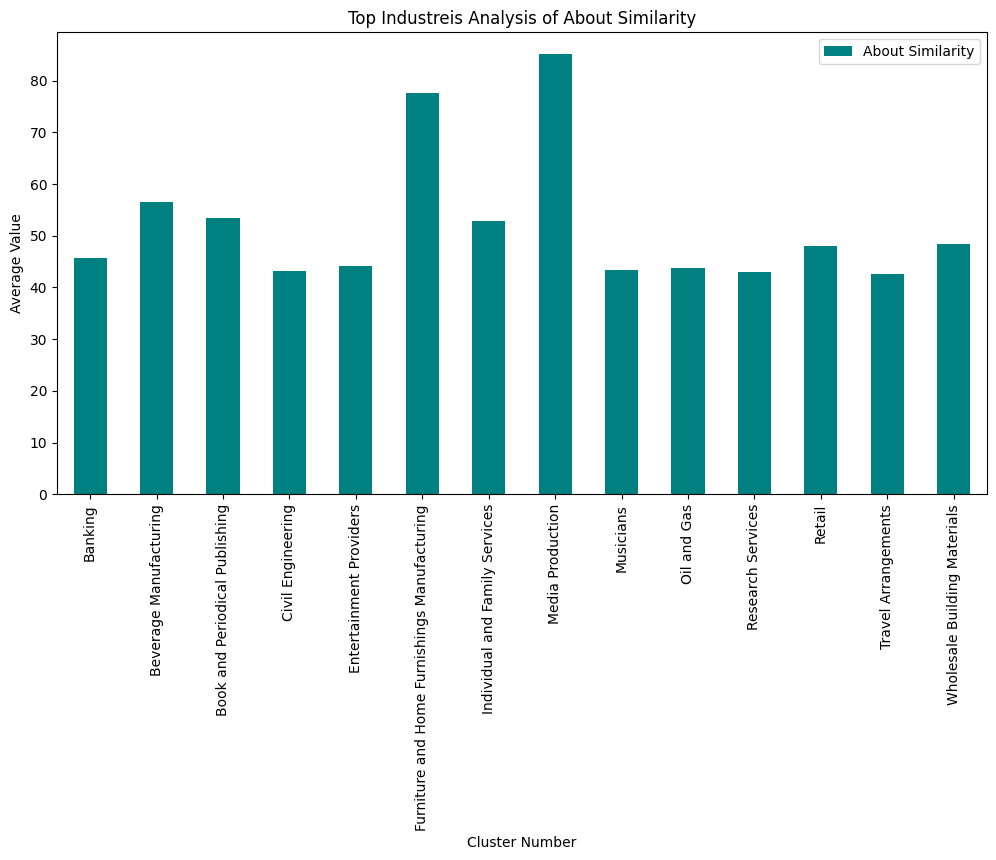

In [0]:
cluster_agg = df.groupby("industries")[["about_similarity"]].mean()

cluster_agg = cluster_agg[cluster_agg["about_similarity"] > 42]

cluster_agg.plot(kind="bar", figsize=(12, 6), color=["teal", "orange"])
plt.title("Top Industreis Analysis of About Similarity")
plt.ylabel("Average Value")
plt.xlabel("Cluster Number")
plt.xticks(rotation=90)
plt.legend(["About Similarity", "Subtitle Diversity Ratio"])
plt.show()


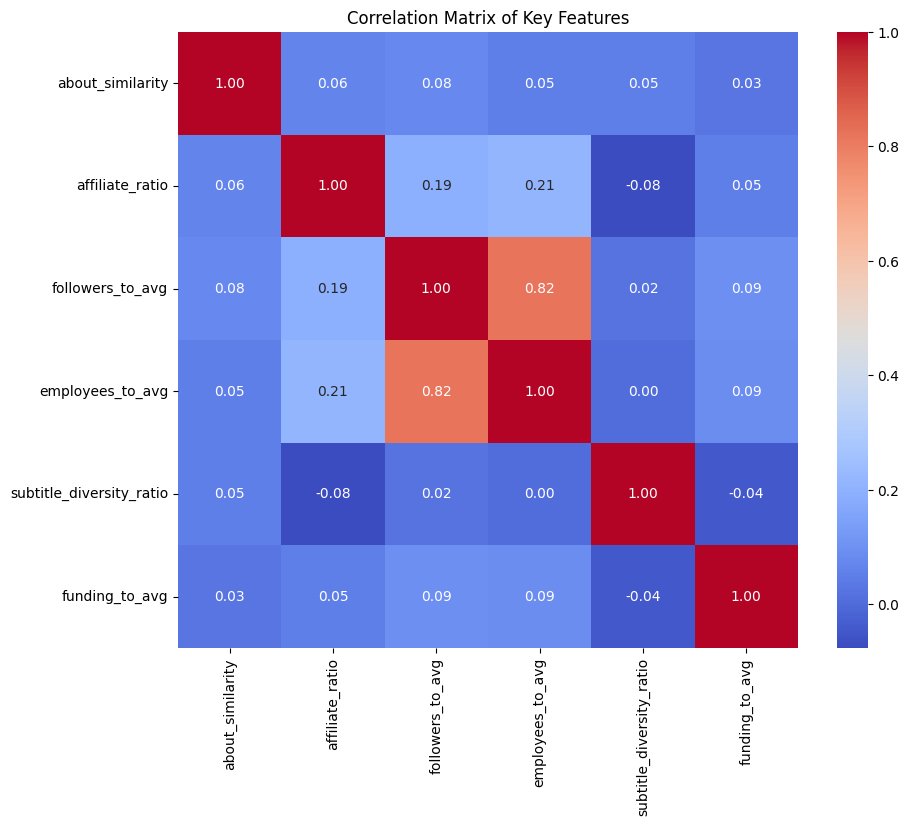

In [0]:
new_features = ["about_similarity", "affiliate_ratio", "followers_to_avg", 
                "employees_to_avg", "subtitle_diversity_ratio", "funding_to_avg"]

correlation_matrix = df[new_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Key Features")
plt.show()
